# **Random Forest**

**Loading libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [3]:
import pandas as pd
df=pd.read_csv("Step_datasets_14.csv")


**Dropping Entity column**

In [4]:
X = df.drop(['ENTITY'], axis=1)

y = df['ENTITY']

**Spliiting dataset into X, Y training and test dataset**

In [5]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [6]:
 !pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.1 MB/s eta 0:00:00


**Importing category encoder**

In [7]:
# import category encoders

import category_encoders as ce

**Transforming X train and test dataset**

In [8]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['KEY', 'D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7','REFERENCES'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [9]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


# fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4507


In [10]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
D2,0.260341
REFERENCES,0.207245
D1,0.192509
D3,0.142514
D4,0.089173
KEY,0.078099
D0,0.023788
D5,0.004806
D6,0.000941
D7,0.000584


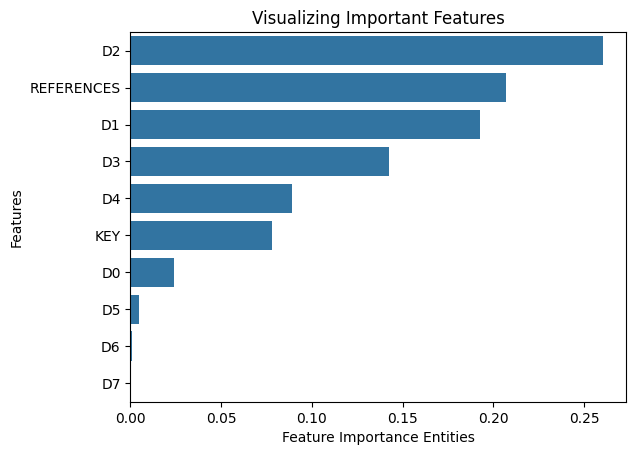

In [12]:
# Creating a seaborn bar plot
import seaborn as sns
import matplotlib.pyplot as plt # data visualization

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Entities')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [13]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  23   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 104   0   0   0   0   0   0  12   0   0   0
    

<Axes: >

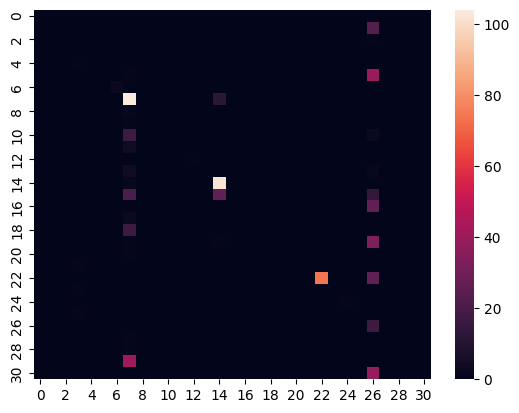

In [14]:
sns.heatmap(cm)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                ADVANCED_BREP_SHAPE_REPRESENTATION       0.00      0.00      0.00         1
                                     ADVANCED_FACE       0.00      0.00      0.00        23
                                          APPROVAL       0.00      0.00      0.00         1
                                     APPROVAL_ROLE       0.00      0.00      0.00         0
                                   APPROVAL_STATUS       0.00      0.00      0.00         1
                                AXIS2_PLACEMENT_3D       0.00      0.00      0.00        41
                                     CALENDAR_DATE       1.00      1.00      1.00         3
                                   CARTESIAN_POINT       0.47      0.90      0.62       116
                CC_DESIGN_DATE_AND_TIME_ASSIGNMENT       0.00      0.00      0.00         2
      CC_DESIGN_PERSON_AND_ORGANIZATION_ASSIGNMENT       0.00      0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_